In [1]:
#Installing and Importing Necessary Libraries
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install nltk
!pip install beautifulsoup4
!pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 72.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-wbg3j9xu
  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-wbg3j9xu
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 0f56a6502679f6750b7f0ffed98f590d1f0246bd
  Preparing metadata (setup.py) ... done
  Created wheel for preprocess_kgptalkie: filename=preprocess_kgptalkie-0.11-py3-none-any.whl size=8175 sha256=e4d2daf7c509e112b47c5c47e2a477c397c02f4652675b2e36637b02ec0e88c9
  Stored in directory: /tmp/pip-ephem-wheel-cache-zu6638mh/wheels/5c/94/34/99d5ff65e88b8d9a6c5e8d8652f2311d87790a61a1b7466e21
Successfully built preprocess_kgptalkie


In [6]:

#T cleaning text.
import preprocess_kgptalkie as ps
ps.download_nltk_data()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [1]:
import numpy as np

In [2]:
#Loading and Inspecting the Data
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/twitter_sentiment.csv', header=None, index_col=[0])
df = df[[2,3]].reset_index(drop=True)
df.columns = ['sentiment', 'text']
df.head()

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [3]:
#Data Cleaning
df.info()

df.isnull().sum()

df.dropna(inplace=True)

df = df[df['text'].apply(len)>1]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  75682 non-null  object
 1   text       74996 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [4]:
df['sentiment'].value_counts()

,count
sentiment,
Negative,22530
Positive,20844
Neutral,18285
Irrelevant,12988


In [8]:
df.columns


Index(['sentiment', 'text'], dtype='object')

#Feature Extraction with Preprocessing

In [22]:
!pip install preprocess_kgptalkie
import pandas as pd
import preprocess_kgptalkie as ps

df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/twitter_sentiment.csv', header=None, index_col=[0])
df = df[[2,3]].reset_index(drop=True)
df.columns = ['sentiment', 'text']

# Convert the 'text' column to strings
df['text'] = df['text'].astype(str)

# Apply the extract_features function to the 'text' column of the DataFrame
# Handle empty text to avoid division by zero
df['features'] = df['text'].apply(lambda x: ps.extract_features(x) if len(x.split()) > 0 else {'word_count': 0, 'char_count': 0, 'avg_word_len': 0, 'stop_words_count': 0, 'hashtags_count': 0, 'mentions_count': 0, 'uppercase_count': 0, 'lowercase_count': 0, 'numerics_count': 0, 'special_char_count': 0})

# Create a new DataFrame from the 'features' column
features_df = pd.DataFrame(df['features'].tolist()) # Create a new dataframe for features

# Concatenate the features DataFrame with the original DataFrame
df = pd.concat([df, features_df], axis=1) # Concatenate the dataframes

# Now you can access the columns attribute
df.columns

Index(['sentiment', 'text', 'features', 'word_count', 'char_count',
       'avg_word_len', 'stop_words_count', 'hashtags_count', 'mentions_count',
       'numerics_count', 'upper_case_count', 'uppercase_count',
       'lowercase_count', 'special_char_count'],
      dtype='object')

In [23]:
df.head()

,sentiment,text,features,word_count,char_count,avg_word_len,stop_words_count,hashtags_count,mentions_count,numerics_count,upper_case_count,uppercase_count,lowercase_count,special_char_count
0,Positive,im getting on borderlands and i will murder yo...,"{'word_count': 11, 'char_count': 43, 'avg_word...",11,43,3.909091,6,0,0,0,0.0,NaN,NaN,NaN
1,Positive,I am coming to the borders and I will kill you...,"{'word_count': 12, 'char_count': 40, 'avg_word...",12,40,3.333333,8,0,0,0,2.0,NaN,NaN,NaN
2,Positive,im getting on borderlands and i will kill you ...,"{'word_count': 10, 'char_count': 41, 'avg_word...",10,41,4.100000,5,0,0,0,0.0,NaN,NaN,NaN
3,Positive,im coming on borderlands and i will murder you...,"{'word_count': 10, 'char_count': 42, 'avg_word...",10,42,4.200000,5,0,0,0,0.0,NaN,NaN,NaN
4,Positive,im getting on borderlands 2 and i will murder ...,"{'word_count': 12, 'char_count': 46, 'avg_word...",12,46,3.833333,6,0,0,1,0.0,NaN,NaN,NaN


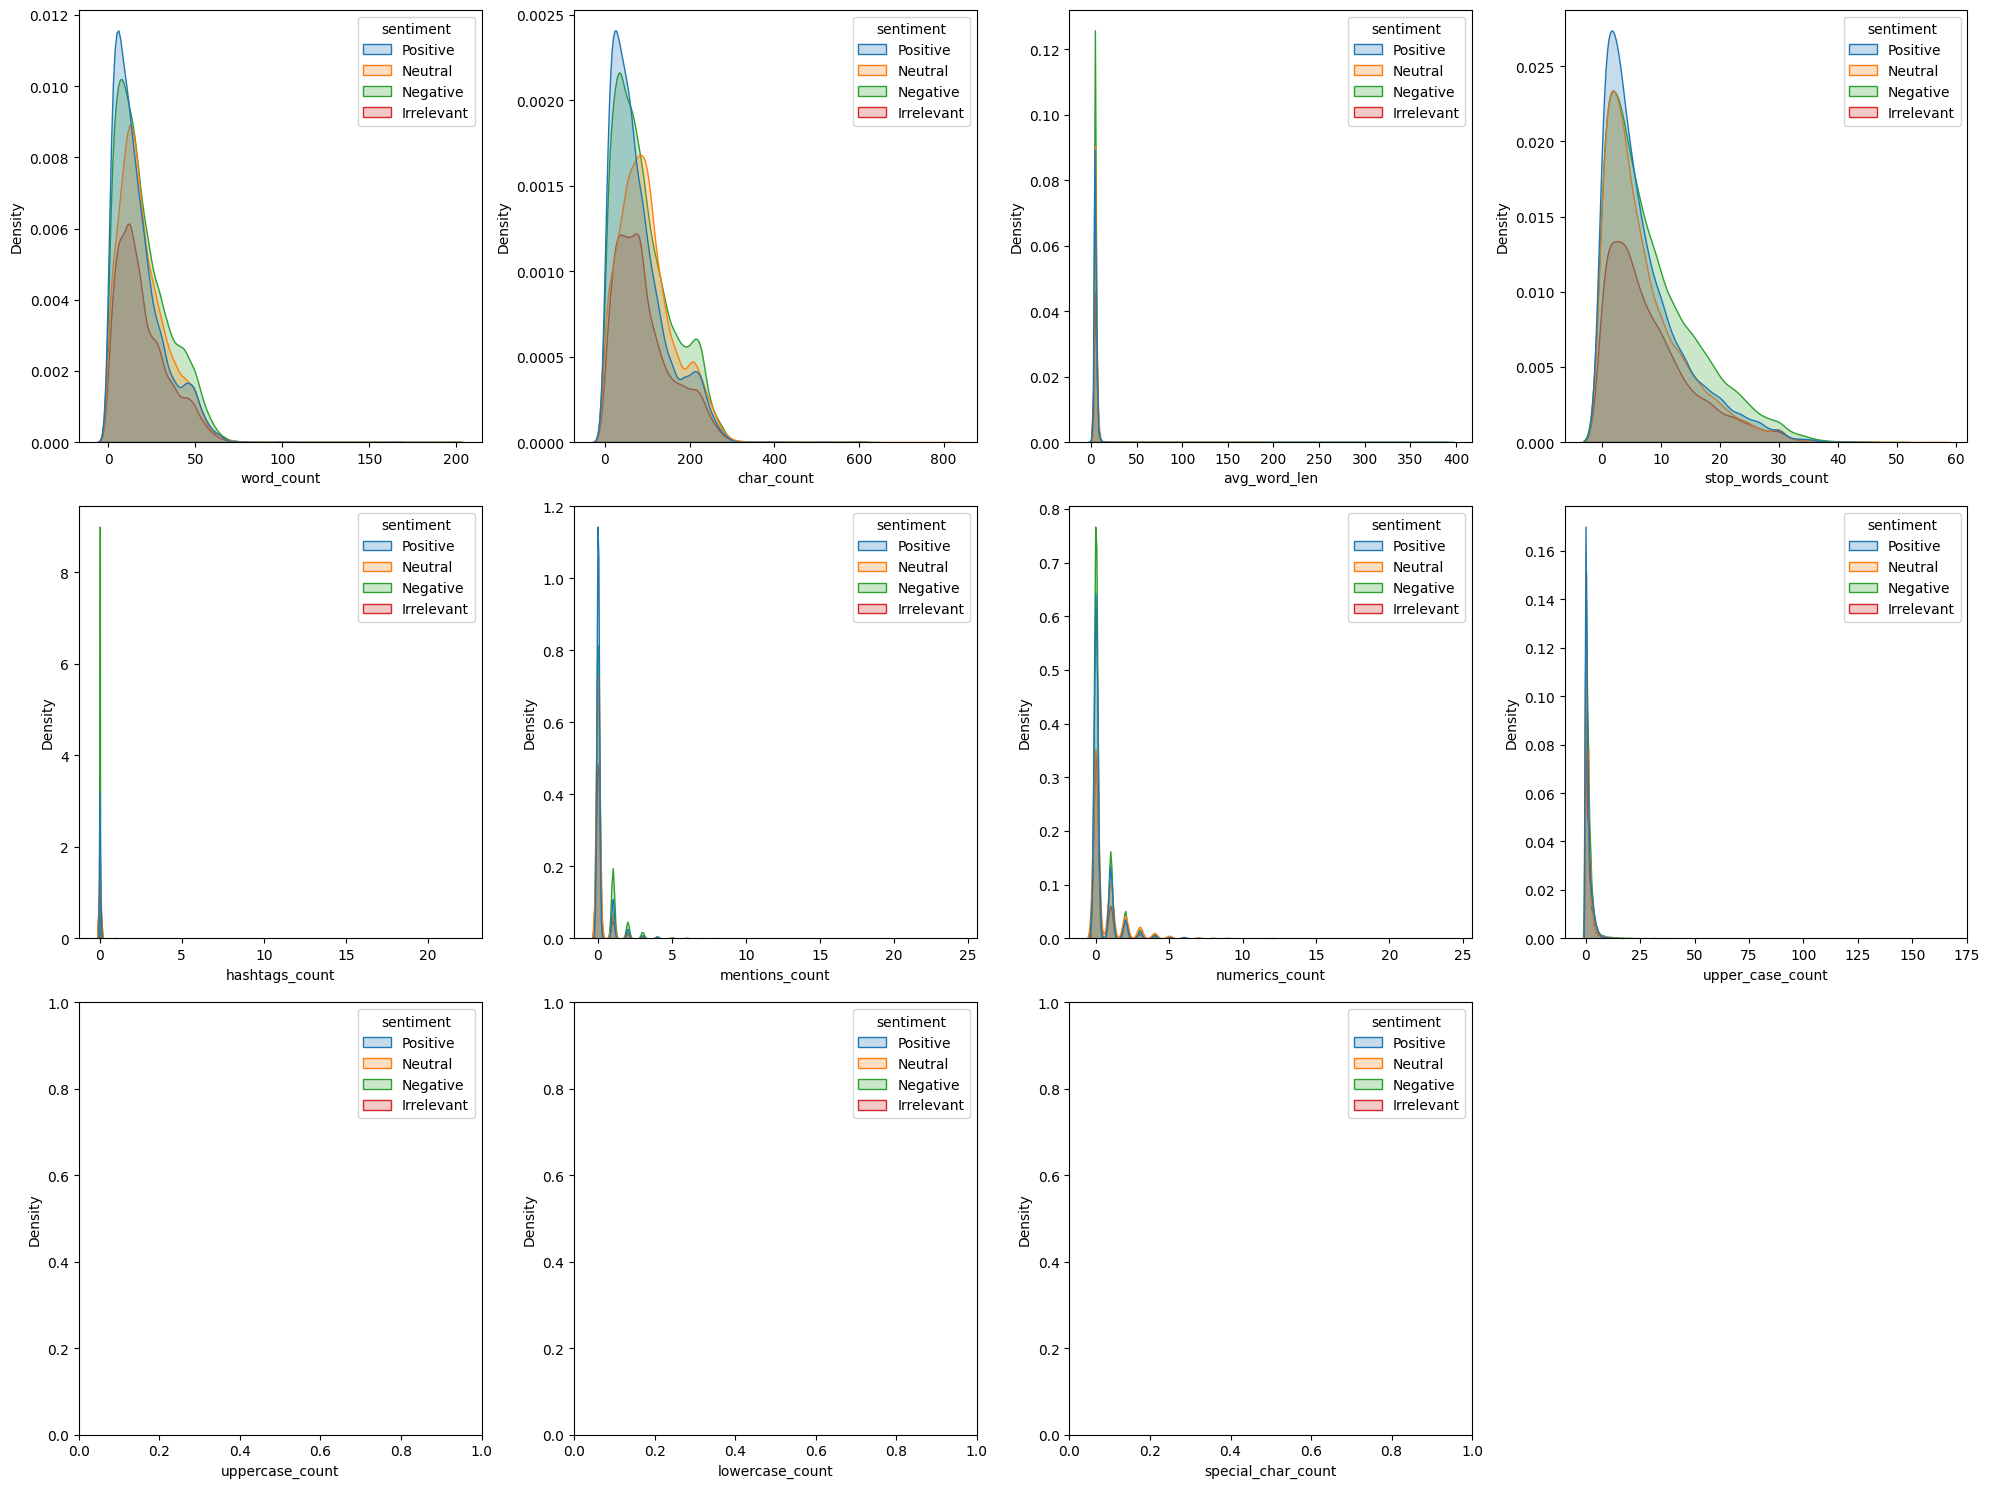

In [25]:
#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# plot 3x4 grid histogram for each numerical feature to accommodate all 11 features
plt.figure(figsize=(20,15)) # Adjust figure size for better visualization

num_cols = df.select_dtypes(include='number').columns

for col in num_cols:
    plt.subplot(3,4, num_cols.get_loc(col)+1) # Changed to 3 rows to fit all plots

    # use sentiment as hue to see the distribution of each numerical feature
    # sns.distplot(df[col], label=col, color='red')
    # sns.histplot(x=col, hue='sentiment', data=df, color='green', bins=100, kde=True)
    sns.kdeplot(data=df, x=col, hue='sentiment', fill=True)

plt.tight_layout() # Add this to prevent overlapping plots
plt.show()

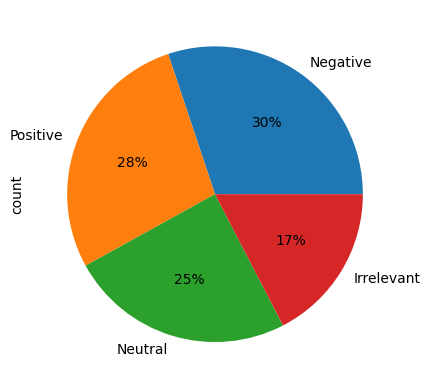

In [26]:
#Word Cloud Visualization
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%')

# word cloud
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

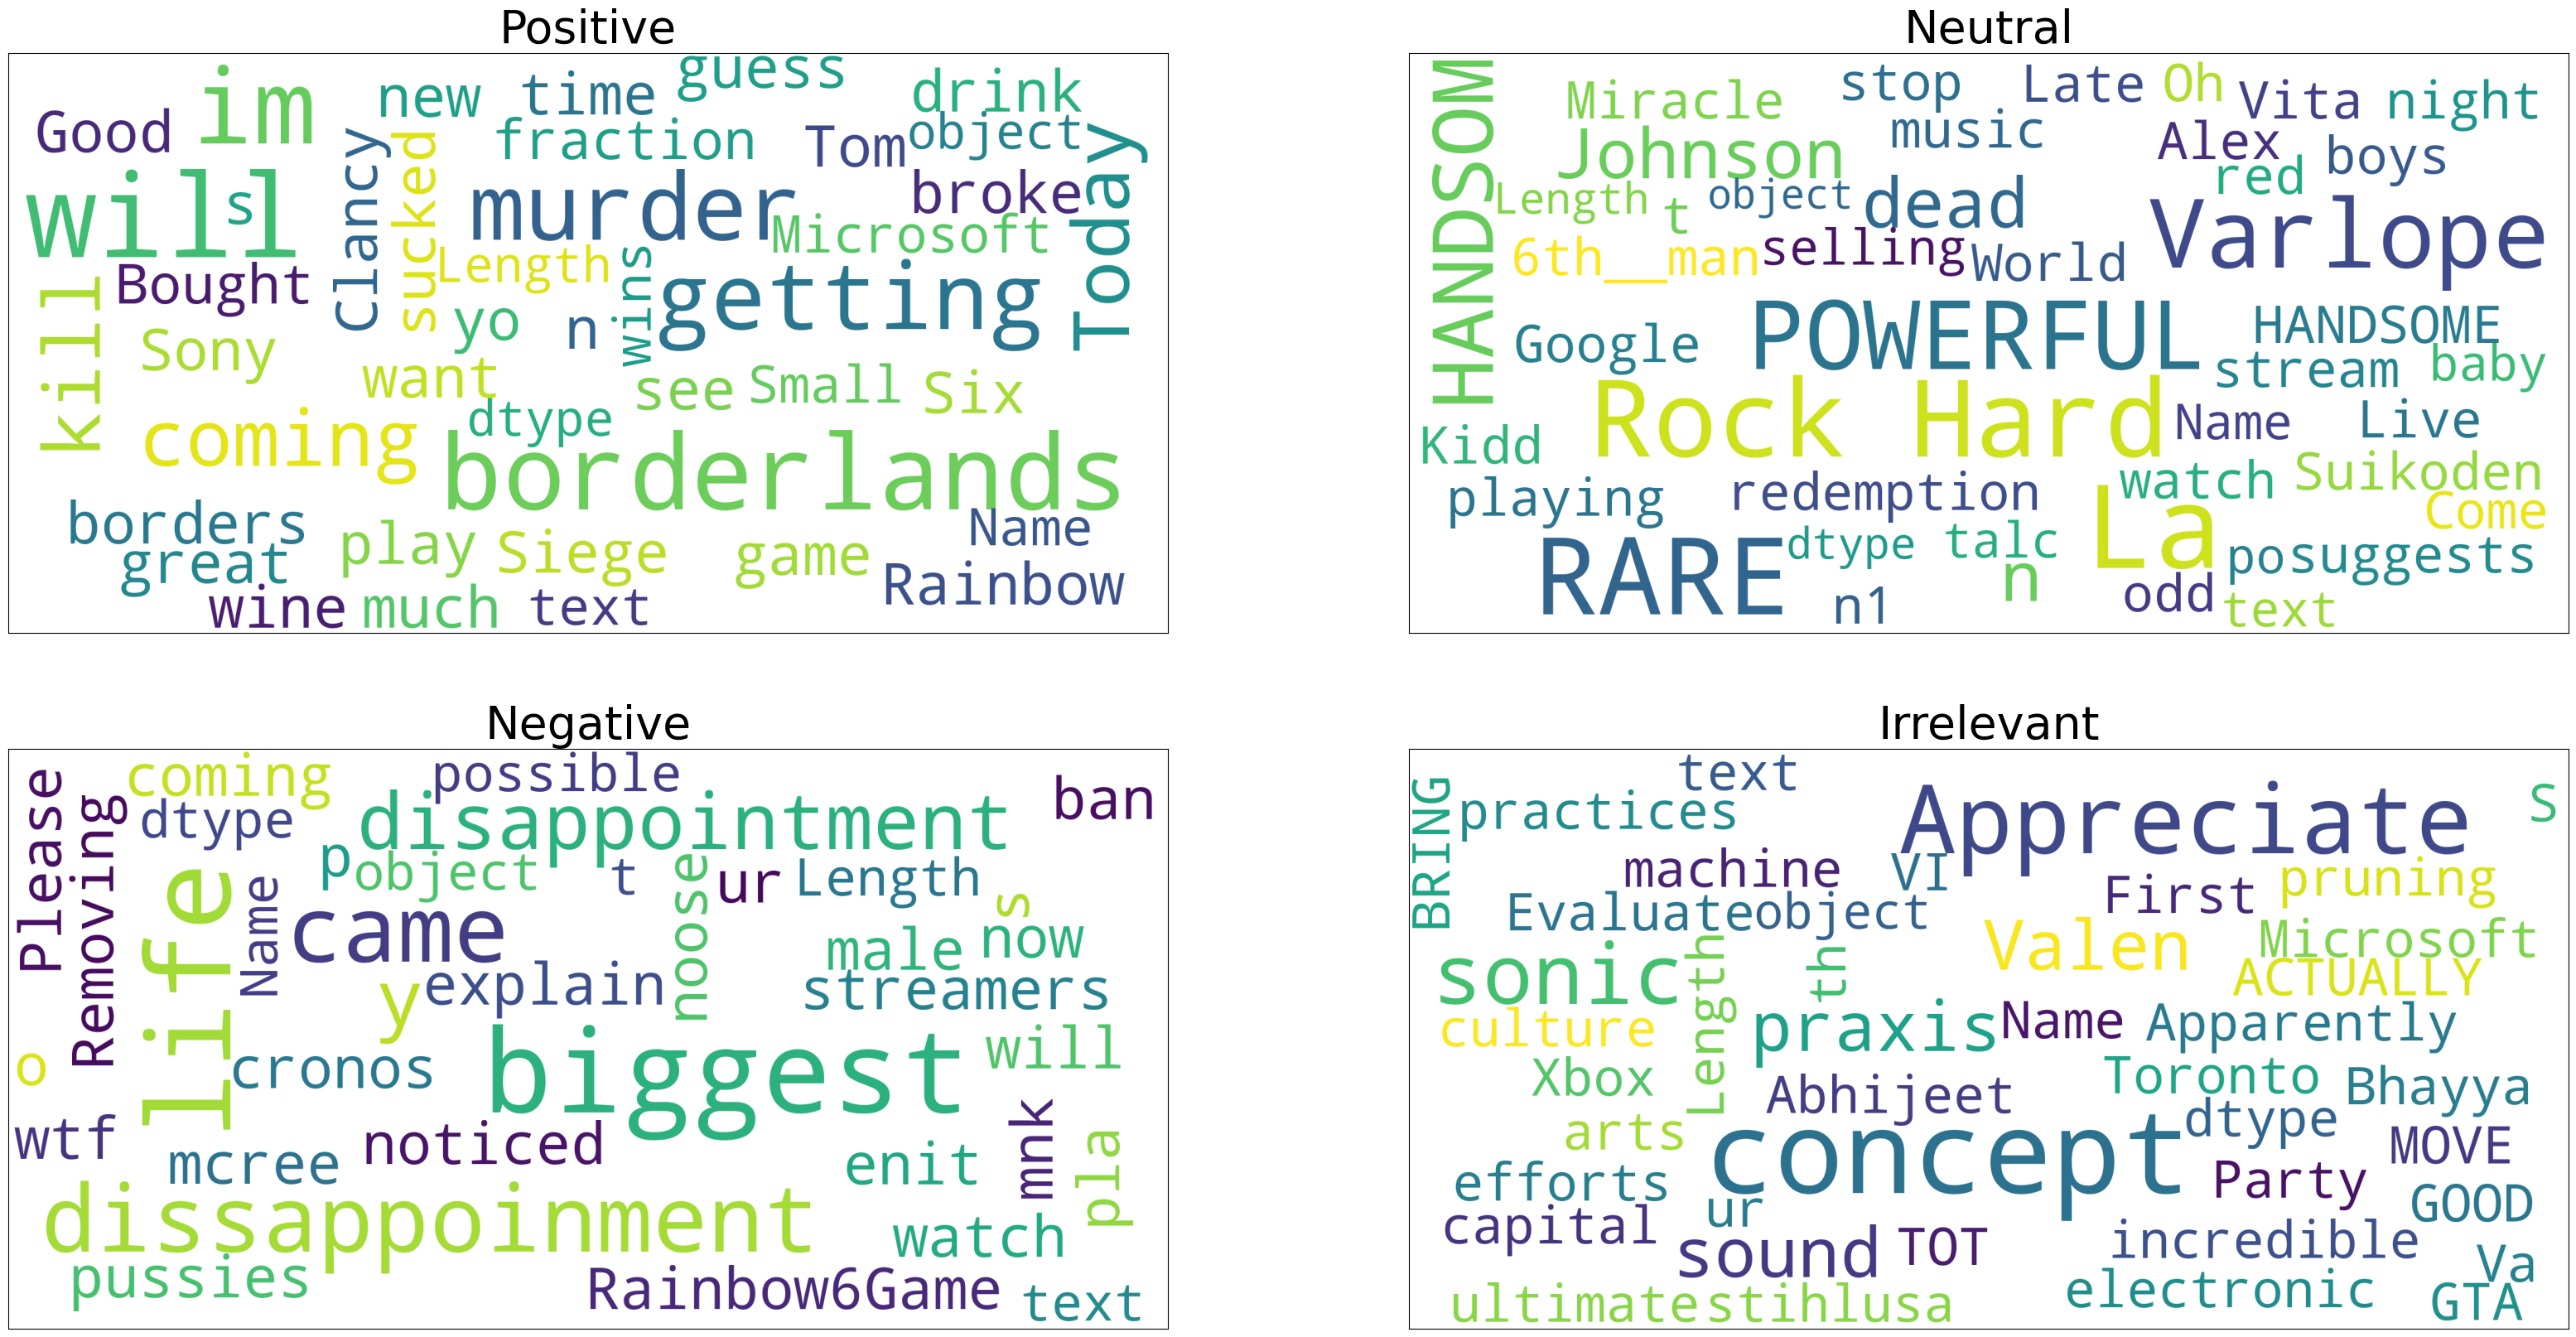

<Figure size 640x480 with 0 Axes>

In [27]:
plt.figure(figsize=(40,20))

for index, col in enumerate(df['sentiment'].unique()):
    plt.subplot(2,2, index+1)
    # print(col)
    df1 = df[df['sentiment']==col]
    data = df1['text']
    wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=500, max_font_size=40, scale=5).generate(str(data))
    # fig = plt.figure(figsize=(15,15))
    # plt.axis('off')
    # disable ticks
    plt.xticks([])
    plt.yticks([])
    plt.imshow(wordcloud)
    plt.title(col, fontsize=40)

plt.show()
plt.tight_layout()

In [28]:
#Text Cleaning
df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].apply(lambda x: ps.remove_urls(x))
df['text'] = df['text'].apply(lambda x: ps.remove_html_tags(x))
df['text'] = df['text'].apply(lambda x: ps.remove_special_chars(x))
df['text'] = df['text'].apply(lambda x: ps.remove_rt(x))

In [29]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)

In [30]:
X_train.shape, X_test.shape

((60545,), (15137,))

In [32]:
# Model Training (Random Forest Classifier)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Convert the stopwords set to a list
clf = Pipeline([('tfidf', TfidfVectorizer(stop_words=list(stopwords))), ('clf', RandomForestClassifier(n_estimators=100, n_jobs=-1))])
clf.fit(X_train, y_train)

# evaluation
from sklearn.metrics import accuracy_score

predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.9042742947743939


In [33]:
#Saving the Model
import pickle

pickle.dump(clf, open('twitter_sentiment.pkl', 'wb'))

In [34]:
#Print Working Directory
import os
print(os.getcwd())


/content


In [43]:
#Testing the Model
clf.predict(['you are alcoholic'])

array(['Positive'], dtype=object)